# Binary Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

np.random.seed(42)
random.seed(42)

pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
df = pd.read_csv("Project_1_dataset_01_01_2022.csv")
df.head()

,Unnamed: 0,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,590,Having made a massive impact in Saudi Arabia w...,Having made a massive impact in Saudi Arabia w...,"['singhs', 'rooting', 'cool', 'saudi', 'style'...",NaN,[],https://www.msn.com/en-in/entertainment/other/...,cricket,sports
1,388,Cricket is all about the emotional rollercoast...,"No matter which team fans hope to win, every s...","['wants', 'fans', 'finals', 'cup', 'win', 'tou...",NaN,[],https://www.prnewswire.com:443/news-releases/c...,cricket,sports
2,423,New Zealand announces back-to-back tours next ...,New Zealand announces back-to-back tours next ...,"['test', 'west', 'tour', 'zealand', 'world', '...",2021-12-20 00:00:00,[],https://www.aljazeera.com/news/2021/12/20/cric...,cricket,sports
3,563,It's not the first time cricket fans in the co...,Billed as one of the pre-tournament favourites...,"['qualify', 'afghanistan', 'cup', 'world', 'ze...",NaN,[],https://www.msn.com/en-in/news/other/t20-world...,cricket,sports
4,634,An employee works on a computer terminal again...,"REUTERS/Sivaram VBENGALURU, Oct 11 (Reuters Br...","['success', 'tech', 'startup', 'talent', 'onli...",2021-10-11 00:00:00,['Una Galani'],https://www.reuters.com/breakingviews/india-in...,cricket,sports


In [ ]:
df.shape

(2072, 9)

**Question 1**: The dataset contains 2072 samples (rows) and 9 features (columns).

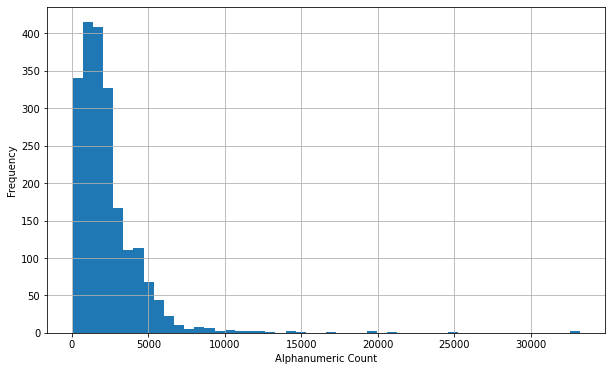

In [ ]:
# histogram of alphanumeric characters

df["alnum_count"] = df['full_text'].str.count('[A-Za-z0-9]') # alphanumeric count feature to dataset

ax = df["alnum_count"].hist(bins=50, figsize=(10,6)) # experiment with 50-100 bins
ax.set_xlabel("Alphanumeric Count")
ax.set_ylabel("Frequency")

plt.show()

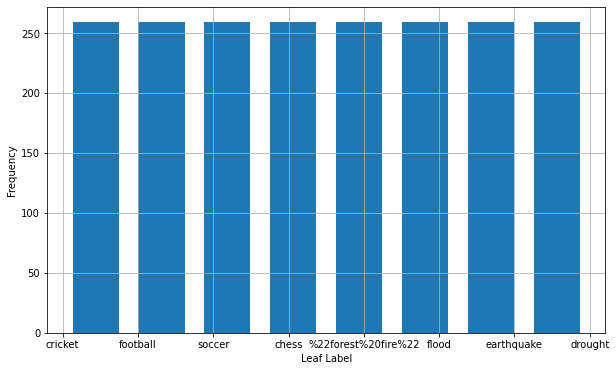

In [ ]:
# histogram of leaf labels

ax = df["leaf_label"].hist(bins=8, figsize=(10,6), rwidth=0.7)
ax.set_xlabel("Leaf Label")
ax.set_ylabel("Frequency")
plt.show()

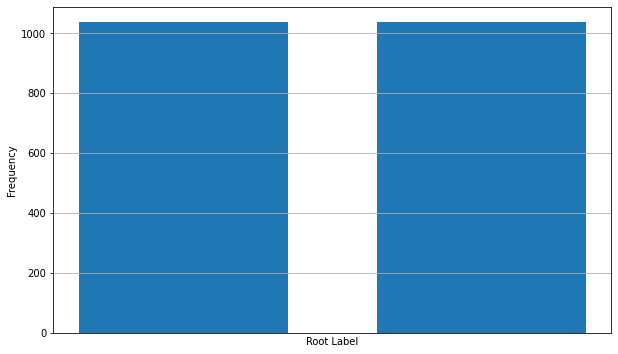

In [ ]:
# histogram of root labels

ax = df["root_label"].hist(bins=2, figsize=(10,6), rwidth=0.7)
ax.set_xlabel("Root Label")
ax.set_ylabel("Frequency")
plt.show()

**Question 1**: The histogram of alphanumeric characters in full_text follows a skewed bell-shaped curve, where the highest frequencies occur at around 2000 alphanumeric characters, and the frequency tapers off for higher alphanumeric counts, with documents containing more than approximately 7000 occuring very rarely. The histograms for leaf_label and root_label show that frequencies of the labels are the same across all classes, so the classes are balanced in this dataset.

## Splitting entire dataset

In [ ]:
from sklearn.model_selection import train_test_split

df_1 = df[["full_text","root_label"]] # data for part 1
train, test = train_test_split(df_1, test_size=0.2)

print(train.shape)
print(test.shape)

(1657, 2)
(415, 2)


**Question 2**: There are 1657 training samples and 415 testing samples.

## Feature extraction

In [ ]:
import re
def clean(text):
    # removes many HTML artefacts from the crawler's output
    # text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r'http\S+', '', text, flags=re.MULTILINE) # remove URLs (e.g. in sample 2)
    texter = re.sub(r'\S+\.com', '', texter, flags=re.MULTILINE) # remove URLs ending in .com that were not removed by previous lines (e.g. in sample 11)
    texter = re.sub(r'www\S+', '', texter, flags=re.MULTILINE) # remove URLs ending in with www that were not removed by previous lines (e.g. in sample 18)
    texter = re.sub(r"<br />", " ", texter)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ', texter)
    texter = re.sub(r'\d+th', '', texter) # remove number terms like "1st", "2nd", "3rd", etc.
    texter = re.sub(r'\d+st', '', texter)
    texter = re.sub(r'\d+nd', '', texter)
    texter = re.sub(r'\d+rd', '', texter)
    texter = re.sub(r'\d+s', '', texter) # remove years like "1970s"
    texter = re.sub(r'(?<=[a-zA-Z])\-(?=[a-zA-Z])', ' ', texter) # replace hyphens joining two words
    # texter = re.sub(r'(?<=[a-zA-Z])\'(?=[a-zA-Z])', '', texter) # remove apostrophes in words
    # texter = re.sub(r'(?<=[a-zA-Z])\.(?=[a-zA-Z])', '', texter) # remove periods within acronyms
    texter = re.sub(r'(?<=[a-zA-Z])/(?=[a-zA-Z])', ' ', texter) # replace slashes joining two words
    texter = re.sub(r'\b[^a-z0-9 ]*\d+[^a-z0-9 ]*\b', '', texter) # remove all numbers
    texter = re.sub(r'\b[^a-z0-9 ]*\d+\.\d+[^a-z0-9 ]*\b', '', texter)
    texter = re.sub(r'\ba\d+', '', texter)
    texter = re.sub(r'\d+(a|p)m', '', texter)
    texter = re.sub(r'__', ' ', texter) # remove __
    texter = re.sub(' +', ' ', texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [ ]:
train["clean_text"] = train["full_text"].apply(clean)
train

,full_text,root_label,clean_text
1431,More than 1 million Washingtonians participate...,climate,More than million Washingtonians participated ...
1567,A 4.7-magnitude earthquake rattled northwest S...,climate,A magnitude earthquake rattled northwest San L...
1044,More campgrounds are coming to the Auburn Stat...,climate,More campgrounds are coming to the Auburn Stat...
175,Retro gamers will be able to relive all the jo...,sports,Retro gamers will be able to relive all the jo...
1610,"SAN SIMEON, Calif. (KGTV) — An earthquake with...",climate,"SAN SIMEON, Calif. (KGTV) An earthquake with ..."
...,...,...,...
1638,The redesigned Ford Ranger made its debut on W...,climate,The redesigned Ford Ranger made its debut on W...
1095,(Newser) – A family that died on a hike in Cal...,climate,(Newser) A family that died on a hike in Cali...
1130,"--News Direct--\n\nPano AI , the leader in wil...",climate,"--News Direct-- Pano AI , the leader in wildfi..."
1294,"EAST TAWAS, Mich. – The public is invited to a...",climate,"EAST TAWAS, Mich. The public is invited to a ..."


In [ ]:
test["clean_text"] = test["full_text"].apply(clean)
test

,full_text,root_label,clean_text
1351,Houston is getting a wet start to the weekend....,climate,Houston is getting a wet start to the weekend....
733,"CLEMSON, S.C. — Oskar Ågren scored the game-wi...",sports,"CLEMSON, S.C. Oskar gren scored the game winn..."
678,"The SoB started in the mid-2000s, soccer fans ...",sports,"The SoB started in the mid-, soccer fans who r..."
1460,"Lauren Rautenkranz, Tim Deegan, Makayla Lucero...",climate,"Lauren Rautenkranz, Tim Deegan, Makayla Lucero..."
411,Huge second quarter leads Sacramento State to ...,sports,Huge second quarter leads Sacramento State to ...
...,...,...,...
772,© Provided by Independent Online (IOL)\n\nCape...,sports,Provided by Independent Online (IOL) Cape Tow...
593,© Provided by The South African\n\nFIFA appear...,sports,Provided by The South African FIFA appears wi...
1674,The major earthquakes that jolted Hawaii and A...,climate,The major earthquakes that jolted Hawaii and A...
881,AT&T and Twitch have launched a mentorship pro...,sports,AT&T and Twitch have launched a mentorship pro...


In [ ]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.tag import pos_tag
import nltk
from nltk.tokenize import sent_tokenize

def lem_analyzer(text):    
    words = []
    for sent in sent_tokenize(text):
        words += lemmatize_sent(sent)
    return " ".join(words)

wnl = nltk.wordnet.WordNetLemmatizer()
def lemmatize_sent(text):
    # lemmatize a sentence as a list of words
    w_tokenizer = WhitespaceTokenizer()
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(w_tokenizer.tokenize(text)) if word not in combined_stopwords and not word.isdigit()]

morphy_tag = {'NN':'n', 'JJ':'a',
              'VB':'v', 'RB':'r'}
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    return morphy_tag.get(penntag[:2], 'n')

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from string import punctuation

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')

combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
combined_stopwords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldn',
 "couldn't",
 'couldnt',
 'cry',
 'd',
 'de',
 'describe',
 'detail',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don

In [ ]:
train["lem_text"] = train["clean_text"].apply(lem_analyzer)
train

,full_text,root_label,clean_text,lem_text
1431,More than 1 million Washingtonians participate...,climate,More than million Washingtonians participated ...,"more million washingtonian participate ""the gr..."
1567,A 4.7-magnitude earthquake rattled northwest S...,climate,A magnitude earthquake rattled northwest San L...,a magnitude earthquake rattle northwest san lu...
1044,More campgrounds are coming to the Auburn Stat...,climate,More campgrounds are coming to the Auburn Stat...,more campground come auburn state recreation a...
175,Retro gamers will be able to relive all the jo...,sports,Retro gamers will be able to relive all the jo...,retro gamers able relive joy classic zx spectr...
1610,"SAN SIMEON, Calif. (KGTV) — An earthquake with...",climate,"SAN SIMEON, Calif. (KGTV) An earthquake with ...","san simeon, calif. (kgtv) an earthquake prelim..."
...,...,...,...,...
1638,The redesigned Ford Ranger made its debut on W...,climate,The redesigned Ford Ranger made its debut on W...,"the redesigned ford ranger debut wednesday, he..."
1095,(Newser) – A family that died on a hike in Cal...,climate,(Newser) A family that died on a hike in Cali...,(newser) a family die hike california's sierra...
1130,"--News Direct--\n\nPano AI , the leader in wil...",climate,"--News Direct-- Pano AI , the leader in wildfi...",--news direct-- pano ai leader wildfire early ...
1294,"EAST TAWAS, Mich. – The public is invited to a...",climate,"EAST TAWAS, Mich. The public is invited to a ...","east tawas, mich. the public invite forum disc..."


In [ ]:
test["lem_text"] = test["clean_text"].apply(lem_analyzer)
test

,full_text,root_label,clean_text,lem_text
1351,Houston is getting a wet start to the weekend....,climate,Houston is getting a wet start to the weekend....,houston get wet start weekend. forecaster nati...
733,"CLEMSON, S.C. — Oskar Ågren scored the game-wi...",sports,"CLEMSON, S.C. Oskar gren scored the game winn...","clemson, s.c. oskar gren score game winning go..."
678,"The SoB started in the mid-2000s, soccer fans ...",sports,"The SoB started in the mid-, soccer fans who r...","the sob start mid-, soccer fan really, really ..."
1460,"Lauren Rautenkranz, Tim Deegan, Makayla Lucero...",climate,"Lauren Rautenkranz, Tim Deegan, Makayla Lucero...","lauren rautenkranz, tim deegan, makayla lucero..."
411,Huge second quarter leads Sacramento State to ...,sports,Huge second quarter leads Sacramento State to ...,huge second quarter lead sacramento state rout...
...,...,...,...,...
772,© Provided by Independent Online (IOL)\n\nCape...,sports,Provided by Independent Online (IOL) Cape Tow...,provide independent online (iol) cape town sou...
593,© Provided by The South African\n\nFIFA appear...,sports,Provided by The South African FIFA appears wi...,provide the south african fifa appear willing ...
1674,The major earthquakes that jolted Hawaii and A...,climate,The major earthquakes that jolted Hawaii and A...,the major earthquake jolt hawaii alaska past d...
881,AT&T and Twitch have launched a mentorship pro...,sports,AT&T and Twitch have launched a mentorship pro...,at&t twitch launch mentorship program aspire t...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = vectorizer.fit_transform(train["lem_text"])
X_test_counts = vectorizer.transform(test["lem_text"])
print(X_train_counts.shape)
print(X_test_counts.shape)

(1657, 11060)
(415, 11060)


In [ ]:
print(vectorizer.get_feature_names_out()[0:100])

['08837phone' '10km' '247sports' '25m' '49ers' '5km' 'aap' 'aaron' 'ab'
 'abandon' 'abated' 'abbott' 'abby' 'abc' 'abdul' 'abhishek' 'abide'
 'abilities' 'ability' 'abject' 'ablate' 'able' 'abnormally' 'abolish'
 'aboriginal' 'abraham' 'abrahamyan' 'abroad' 'abrupt' 'absence' 'absent'
 'absolute' 'absolutely' 'absorb' 'abstract' 'abu' 'abundance' 'abundant'
 'abundantly' 'abuse' 'abuses' 'abusive' 'ac' 'academic' 'academy' 'acc'
 'accelerate' 'accent' 'accents' 'accept' 'acceptable' 'acceptance'
 'access' 'accessibility' 'accessible' 'accessories' 'accessory'
 'accident' 'accolade' 'accomack' 'accommodation' 'accompany' 'accomplish'
 'accomplished' 'accomplishment' 'accord' 'accordance' 'according'
 'accordingly' 'account' 'accountability' 'accountable' 'accounting'
 'accounts' 'accumulate' 'accumulation' 'accuracy' 'accurate' 'accurately'
 'accusation' 'accuse' 'accuweather' 'ace' 'achieve' 'achievement'
 'achievements' 'acid' 'acknowledge' 'acknowledgment' 'acl' 'acoustic'
 'acquire'

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(1657, 11060)
(415, 11060)


**Question 3**:
* Stemming simply removes the rightmost characters of words, which can result in non-existent and incorrect word stems. It can be useful for simplifying a database of words when many terms have the same meaning but with different affixes. Lemmatizing uses linguistic rules to find a root word, guarantees that the result is a real word, but may return a different word with a similar meaning. For example, "better" will be lemmatized to "good" when the part of speech is specified as an adjective. Stemming can produce a dictionary of a smaller size than lemmatizing, because it is more aggressive at simplifying words than lemmatization is. Lemmatization leaves the word unchanged if it cannot find a lemma for it, whereas stemming will apply a set of rules to all words to reduce them as much as possible.
* Decreasing min_df would increase the size of the dictionary, so the number of columns in the TF-IDF matrix would increase. A min_df of 1 is equivalent to adding all distinct terms that occur in the training data to the dictionary. Increasing min_df would decrease the size of the dictionary, since it omits more rare words that occur only in a few documents. With a min_df of 3, the dictionary size is 11060, where as min_df of 1 produces a dictionary size of 31242, and min_df of 5 produces a dictionary size of 7387.
* Stopwords should be removed after lemmatizing, because some stopwords in the text may occur in various forms that do not match the defined set of stopwords exactly. For example, the sklearn set of stopwords includes "name" but not "names". Punctuation should be removed before lemmatizing, as words with puntuation are not lemmatized correctly. For instance "hours," is not lemmatized to "hour" since the comma is included. Lemmatizing before stopwords would remove variations of stopwords as intended. However, punctuation should not be removed during cleaning, since puncutation is needed to tokenize documents into sentences, as the parts-of-speech tagger operates more accurately on sentences than on individual words. Numbers were removed in the clean() function before lemmatizing, since lemmatizing operates on words and not number terms, and lemmatizing a number simply returns the same number, so removing numbers first avoids unecessary processing.
* The TF-IDF-processed train matrix has shape (1657,11060), and the TF-IDF-processed test matrix has shape (415,11060). Since they have 11060 columns, the dictionary contains 11060 words after cleaning and lemmatizing.

## Dimensionality reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD

k_list = [1, 10, 50, 100, 200, 500, 1000, 2000]
var_list = []

for k in k_list:
    lsi = TruncatedSVD(n_components=k, n_iter=100)
    lsi.fit(X_train_tfidf)
    var_list.append(lsi.explained_variance_ratio_.sum())

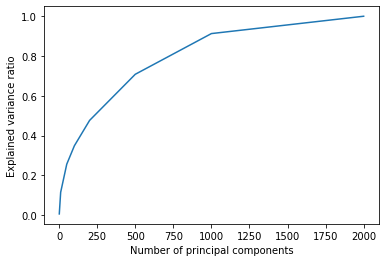

In [ ]:
plt.figure()
plt.plot(k_list, var_list)
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance ratio")
plt.show()

**Question 4**: The plot is an increasing curve that rises quickly at small $k$ and slowly at large $k$. The concavity suggests that the principal components corresponding to the largest few singular values contain more of the information about the dataset than the same number of components corresponding to smaller singular values. After about 1000 features, keeping more features has diminishing returns with respect to the explained variance ratio and would likely not improve classification performance much.

In [ ]:
k = 50
lsi = TruncatedSVD(n_components=k, n_iter=100)
X_train_lsi = lsi.fit_transform(X_train_tfidf)
print(X_train_lsi.shape)

(1657, 50)


In [ ]:
U = X_train_lsi / lsi.singular_values_
Sigma_matrix = np.diag(lsi.singular_values_)
VT = lsi.components_
Xk = np.matmul(U, np.matmul(Sigma_matrix,VT)) # approximate X from SVD
Xk.shape

(1657, 11060)

In [ ]:
# reconstruction residual of LSI
np.linalg.norm(X_train_tfidf-Xk, ord='fro')**2

1196.2560881345225

In [ ]:
from sklearn.decomposition import NMF

k = 50
nmf_model = NMF(n_components=k, init='random', max_iter=500)
W_train = nmf_model.fit_transform(X_train_tfidf)
print(W_train.shape)

H = nmf_model.components_
print(H.shape)

(1657, 50)
(50, 11060)


In [ ]:
# reconstruction residual of NMF
np.linalg.norm(X_train_tfidf-np.matmul(W_train,H), ord='fro')**2

1218.0264817498776

**Question 4**: The reconstruction residual MSE error is larger in NMF because optimization problem in NMF is not convex, and the local minimum that NMF converges to is highly dependent on initial conditions. In contrast, SVD is more deterministic since it tries to compute the eigenvectors and eigenvalues of the training data.


## Classification algorithms

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
X_test_lsi = lsi.transform(X_test_tfidf)
print(X_test_lsi.shape)

(415, 50)


In [ ]:
def score_and_roc_svm(c, X_train_lsi, X_test_lsi, train_root_label, test_root_label):
    # confusion matrix
    svmc = svm.SVC(C=c, probability=True)
    svmc.fit(X_train_lsi.tolist(), train_root_label.tolist())
    test_pred = svmc.predict(X_test_lsi.tolist())
    test_pred_proba = svmc.predict_proba(X_test_lsi)  
    
    print('confusion matrix')
    print(confusion_matrix(test_root_label, test_pred))
    print('accuracy: {}'.format(accuracy_score(test_root_label, test_pred)))
    print('recall: {}'.format(recall_score(test_root_label, test_pred, pos_label='sports')))
    print('precision: {}'.format(precision_score(test_root_label, test_pred, pos_label='sports')))
    print('f1 score: {}'.format(f1_score(test_root_label, test_pred, pos_label='sports' )))
    
    fpr, tpr, thresholds = roc_curve(test["root_label"], test_pred_proba[:,1], pos_label='sports')
    roc_auc = auc(fpr,tpr)
    print('AUC: {}'.format(roc_auc))
    plt.plot(fpr, tpr, lw=2, label='area under curve = %0.4f' % roc_auc)
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.legend(loc="lower right")
    

confusion matrix
[[197   9]
 [  9 200]]
accuracy: 0.9566265060240964
recall: 0.9569377990430622
precision: 0.9569377990430622
f1 score: 0.9569377990430622
AUC: 0.9922190737213732


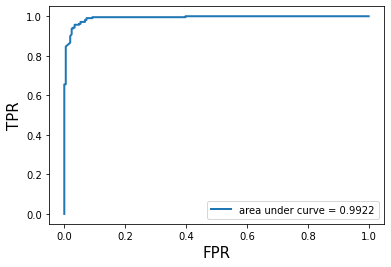

In [ ]:
# hard margin
score_and_roc_svm(1000, X_train_lsi, X_test_lsi, train["root_label"], test["root_label"])

confusion matrix
[[206   0]
 [209   0]]
accuracy: 0.4963855421686747
recall: 0.0
precision: 0.0
f1 score: 0.0
AUC: 0.020392994843684675


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


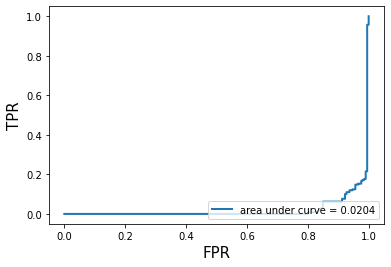

In [ ]:
# soft margin
score_and_roc_svm(0.0001, X_train_lsi, X_test_lsi, train["root_label"], test["root_label"])

confusion matrix
[[197   9]
 [  9 200]]
accuracy: 0.9566265060240964
recall: 0.9569377990430622
precision: 0.9569377990430622
f1 score: 0.9569377990430622
AUC: 0.9922190737213732


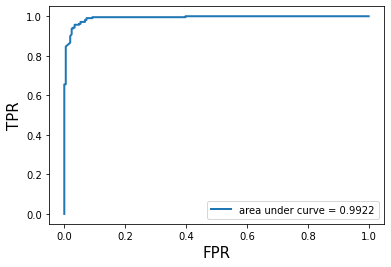

In [ ]:
score_and_roc_svm(100000, X_train_lsi, X_test_lsi, train["root_label"], test["root_label"])

In [ ]:
from sklearn.model_selection import cross_val_score

c_list = np.logspace(-3, 6, 10)
acc_list = []
for c in c_list:
    clf = svm.SVC(C=c, probability=True)
    scores = cross_val_score(clf, X_train_lsi.tolist(), train["root_label"].tolist(), cv=5, scoring='accuracy')
    acc_list.append(scores.mean())

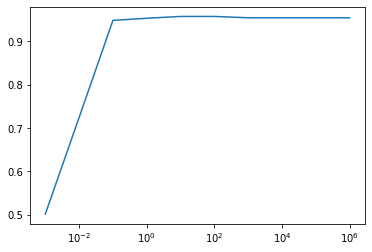

In [ ]:
plt.axes(xscale='log')
plt.plot(c_list, acc_list)
plt.show()

In [ ]:
opt_c = c_list[np.argmax(acc_list)]
print('Optimal gamma from cross-validation: {}'.format(opt_c))

Optimal gamma from cross-validation: 10.0


confusion matrix
[[200   6]
 [  4 205]]
accuracy: 0.9759036144578314
recall: 0.9808612440191388
precision: 0.9715639810426541
f1 score: 0.9761904761904763
AUC: 0.9944488316997259


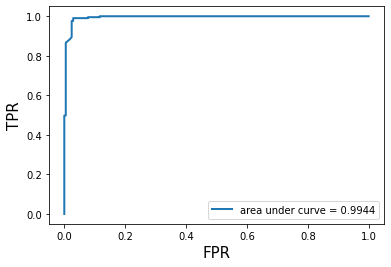

In [ ]:
score_and_roc_svm(opt_c, X_train_lsi, X_test_lsi, train["root_label"], test["root_label"])

**Question 5**: 
* The confusion matrix, accuracy, recall, precision, and F1 score of the three SVM classifiers are reported above. SVM with $\gamma=1000$ performs as well as SVM with $\gamma=100000$, and both of these are much better than SVM with $\gamma=0.0001$.
* For soft margin SVM, $\gamma=0.0001$ is too small, so misclassification of training data is very lightly penalized. All predicted results are labeled as 'climate', so in the confusion matrix, TP=206, FP=209, FN=TN=0. The model has an accuracy of 0.49, and precision, recall, and F1 score are all zero.
* ROC curve's AUC of soft margin SVM is about 0.02, indicating poor performance. The ROC curve shows that the TPR stays close to zero until the FPR is close to one, so the soft margin SVM has very poor separability between classes.
* The best value of $\gamma$ is 100. The confusion matrix, accuracy, recall, precision, and F1 score for this best SVM are reported above.

In [ ]:
from sklearn.linear_model import LogisticRegression

def score_and_roc_logreg(c, X_train_lsi, X_test_lsi, train_root_label, test_root_label, pe):
    # confusion matrix
    logreg = LogisticRegression(penalty=pe, C=c, solver="saga", max_iter=4000)
    logreg.fit(X_train_lsi.tolist(), train_root_label.tolist())
    test_pred=logreg.predict(X_test_lsi.tolist())
    test_pred_proba = logreg.predict_proba(X_test_lsi.tolist())
    
    print('confusion matrix')
    print(confusion_matrix(test_root_label, test_pred))
    print('accuracy: {}'.format(accuracy_score(test_root_label, test_pred)))
    print('recall: {}'.format(recall_score(test_root_label, test_pred, pos_label='sports')))
    print('precision: {}'.format(precision_score(test_root_label, test_pred, pos_label='sports')))
    print('f1 score: {}'.format(f1_score(test_root_label, test_pred, pos_label='sports' )))
    
    fpr, tpr, thresholds = roc_curve(test["root_label"], test_pred_proba[:,1], pos_label='sports')
    roc_auc = auc(fpr,tpr)
    print('AUC: {}'.format(roc_auc))
    plt.plot(fpr, tpr, lw=2, label='area under curve = %0.4f' % roc_auc)
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.legend(loc="lower right")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


confusion matrix
[[199   7]
 [  3 206]]
accuracy: 0.9759036144578314
recall: 0.9856459330143541
precision: 0.9671361502347418
f1 score: 0.976303317535545
AUC: 0.9964463232220003


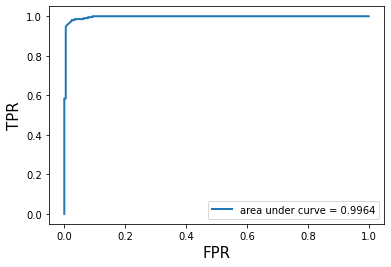

In [ ]:
# logistic classifier without regularization
score_and_roc_logreg(1e42, X_train_lsi, X_test_lsi, train["root_label"], test["root_label"], 'none')

In [ ]:
# 5-fold CV on optimal regularization strength for L1 and L2 regularization

reg_list = ['l1','l2']
c_range = np.logspace(-4, 4, 9)

for reg in reg_list:
    acc_list = []
    for c in c_range:
        logreg = LogisticRegression(penalty=reg, C=c, solver="saga", max_iter=4000)
        scores = cross_val_score(logreg, X_train_lsi.tolist(), train["root_label"].tolist(), cv=5, scoring='accuracy')
        acc_list.append(scores.mean())
    
    opt_c = c_range[np.argmax(acc_list)]
    print("Regularization: {}, optimal coefficient: {}".format(reg, opt_c))

Regularization: l1, optimal coefficient: 10.0
Regularization: l2, optimal coefficient: 10.0


confusion matrix
[[199   7]
 [  3 206]]
accuracy: 0.9759036144578314
recall: 0.9856459330143541
precision: 0.9671361502347418
f1 score: 0.976303317535545
AUC: 0.9961676034747062


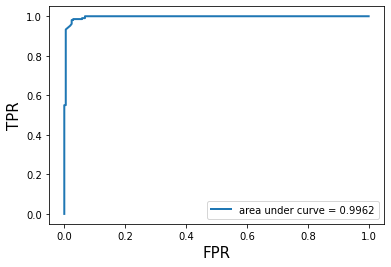

In [ ]:
# L1 regularization with optimal gamma
score_and_roc_logreg(10, X_train_lsi, X_test_lsi, train["root_label"], test["root_label"], 'l1')

confusion matrix
[[199   7]
 [  3 206]]
accuracy: 0.9759036144578314
recall: 0.9856459330143541
precision: 0.9671361502347418
f1 score: 0.976303317535545
AUC: 0.9949598179030985


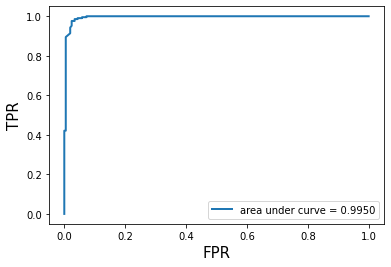

In [ ]:
# L2 regularization with optimal gamma
score_and_roc_logreg(10, X_train_lsi, X_test_lsi, train["root_label"], test["root_label"], 'l2')

**Question 6**: 
* The optimal regularization strength found from 5-fold cross-validation for L1 regularization and L2 regularization are both 10.
* All three classifiers -- no regularization, L1 regularization with $k=10$, and L2 regularization with $k=10$ -- all perform well. The AUC for each are all greater than 0.99, and accuracies, recalls, precisions, and F1 scores are also all avove 0.96.
* When the regularization parameter is increased, the test error will first increase and then decrease. Some regularization can help avoid overfitting, but when regularization is too strong, it causes underfitting. When the regularization parameter is increased, the learnt coefficients tend to smaller values. L1 and L2 are different kinds of regularization. L1 is least absolute deviation so it penalizes differently sized errors equally, while L2 is least squares error and penalizes large errors more. L1 can also be helpful in feature selection.
* The loss functions of SVM and logistic regression are different. The loss fuction of SVM is hinge loss, while for logistic regression uses logistic loss. SVM only considers support vectors, while logistic regression considers all data points with different weights. Logistic regression could have the problem of over-fitting, while SVM does not. According to the ROC curves above, the performances of SVM and logistic regression do not differ significantly.


In [ ]:
from sklearn.naive_bayes import GaussianNB

def score_and_roc_gau(X_train_lsi, X_test_lsi, train_root_label, test_root_label):
    # confusion matrix
    clf = GaussianNB()
    clf.fit(X_train_lsi.tolist(), train_root_label.tolist())
    test_pred = clf.predict(X_test_lsi.tolist())
    test_pred_proba = clf.predict_proba(X_test_lsi.tolist())
    
    print('confusion matrix')
    print(confusion_matrix(test_root_label, test_pred))
    print('accuracy: {}'.format(accuracy_score(test_root_label, test_pred)))
    print('recall: {}'.format(recall_score(test_root_label, test_pred, pos_label='sports')))
    print('precision: {}'.format(precision_score(test_root_label, test_pred, pos_label='sports')))
    print('f1 score: {}'.format(f1_score(test_root_label, test_pred, pos_label='sports' )))
    
    fpr, tpr, thresholds = roc_curve(test["root_label"], test_pred_proba[:,1], pos_label='sports')
    roc_auc = auc(fpr,tpr)
    print('AUC: {}'.format(roc_auc))
    plt.plot(fpr, tpr, lw=2, label='area under curve = %0.4f' % roc_auc)
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.legend(loc="lower right")

confusion matrix
[[200   6]
 [  9 200]]
accuracy: 0.963855421686747
recall: 0.9569377990430622
precision: 0.970873786407767
f1 score: 0.9638554216867469
AUC: 0.9814883634505505


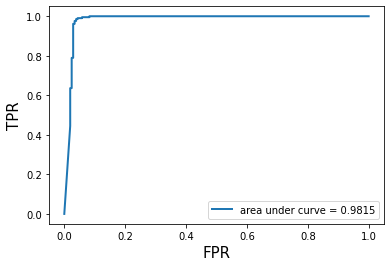

In [ ]:
score_and_roc_gau(X_train_lsi, X_test_lsi, train["root_label"], test["root_label"])

**Question 7**: The Roc curve, confusion matrix, accuracy, recall, precision and F1 score are above.

## Gridsearch of parameters

In [ ]:
from tempfile import mkdtemp
from shutil import rmtree
import nltk
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
import joblib
from joblib import Memory
from sklearn.model_selection import GridSearchCV
#from pipelinehelper import PipelineHelper
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.snowball import FrenchStemmer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn import svm
from sklearn import linear_model
# clean vs not clean
# clean: train["clean_text"]
# not clean: train["full_text"]
import time
full_time = time.time()

wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()
tfidf = TfidfTransformer()
scaler = StandardScaler(with_mean=False) # not absolutely required but does help
gaussian = GaussianNB()
stemmer = FrenchStemmer()
location = "cachedir"
memory = Memory(location=location, verbose=10)


def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
#def stem_rmv_punc(doc):
#    return (word for word in stemmed_words(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

def lemmatize_sent(text):
    # lemmatize a sentence as a list of words
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(text)]
def lem_analyzer(text):
    return (word for word in lemmatize_sent(analyzer(text)) if word not in combined_stopwords and not word.isdigit())

pipe = Pipeline(steps=[ 
                       ("vect", CountVectorizer()),
                       ("tfidf", TfidfTransformer()),
                       ("scaler", StandardScaler(with_mean=False)), 
                       ('dim_redu', None),
                       ('clf', None),
                        ], memory=memory)

k_list=[5, 50, 500]
optc_svm=100
optc_l1=10
optc_l2=10
min_dif=[3, 5]

param_grid = [{
        
        'vect': [
            CountVectorizer(min_df=3, analyzer=lem_analyzer),
            #CountVectorizer(min_df=3, analyzer=stemmed_words),
            CountVectorizer(min_df=5, analyzer=lem_analyzer),
            #CountVectorizer(min_df=5, analyzer=stemmed_words)
        ],
    
       
        'dim_redu': [     
                TruncatedSVD(n_components=5, n_iter=100, random_state=42), 
                TruncatedSVD(n_components=50, n_iter=100, random_state=42),
                NMF(n_components=5, init='random',random_state=42),
                NMF(n_components=50, init='random',random_state=42),
                                  
        ],
        
        
        'clf': [
               svm.SVC(C=optc_svm, probability=True,random_state=42), 
               linear_model.LogisticRegression(penalty='l1', C=optc_l1, solver="saga", max_iter=4000,random_state=42),
               linear_model.LogisticRegression(penalty='l2', C=optc_l2, solver="saga", max_iter=4000,random_state=42)]
        
        
       
    }]
    
search = GridSearchCV(pipe, param_grid=param_grid, cv=5,scoring='accuracy',error_score="raise")
search.fit(train["clean_text"].tolist(), train["root_label"].tolist())
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
   
memory.clear(warn=False)
rmtree(location)
print("--- %s seconds ---" % (time.time() - full_time))

import pandas as pd
result = pd.DataFrame(search.cv_results_)
result.sort_values(by='rank_test_score')
#pd.DataFrame(search.cv_results_)

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/7713bf1406828cf10689487f42cae0b6
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/f15bf5cc6fe40d79c32098b1327a1aae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/777d8c1072b0bfba0c98b8966e8b721f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transform_one/0530433906a815d5ef2de9b379f63be3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir/joblib/sklearn/pipeline/_fit_transfor

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_dim_redu,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.531304,0.253114,10.375261,2.795697,"SVC(C=100, probability=True, random_state=42)","TruncatedSVD(n_components=50, n_iter=100, rand...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': SVC(C=100, probability=True, random_st...",0.957831,0.945783,0.921450,0.939577,0.942598,0.941448,0.011764,1
3,0.387948,0.011765,8.371849,0.319729,"SVC(C=100, probability=True, random_state=42)","TruncatedSVD(n_components=50, n_iter=100, rand...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': SVC(C=100, probability=True, random_st...",0.945783,0.948795,0.918429,0.918429,0.936556,0.933598,0.013026,2
19,2.697049,0.827134,8.380828,0.369918,"LogisticRegression(C=10, max_iter=4000, random...","TruncatedSVD(n_components=50, n_iter=100, rand...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': LogisticRegression(C=10, max_iter=4000...",0.942771,0.942771,0.912387,0.939577,0.927492,0.933000,0.011743,3
11,3.238855,0.990659,8.341438,0.355356,"LogisticRegression(C=10, max_iter=4000, penalt...","TruncatedSVD(n_components=50, n_iter=100, rand...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': LogisticRegression(C=10, max_iter=4000...",0.942771,0.942771,0.912387,0.936556,0.927492,0.932395,0.011463,4
22,1.489608,0.227933,8.420905,0.382951,"LogisticRegression(C=10, max_iter=4000, random...","NMF(init='random', n_components=50, random_sta...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': LogisticRegression(C=10, max_iter=4000...",0.951807,0.939759,0.906344,0.927492,0.927492,0.930579,0.015108,5
18,2.495429,0.908643,8.550993,0.451196,"LogisticRegression(C=10, max_iter=4000, random...","TruncatedSVD(n_components=50, n_iter=100, rand...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': LogisticRegression(C=10, max_iter=4000...",0.939759,0.948795,0.906344,0.933535,0.921450,0.929977,0.014790,6
10,3.020311,1.090742,8.306051,0.332371,"LogisticRegression(C=10, max_iter=4000, penalt...","TruncatedSVD(n_components=50, n_iter=100, rand...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': LogisticRegression(C=10, max_iter=4000...",0.939759,0.948795,0.906344,0.933535,0.921450,0.929977,0.014790,6
6,0.436136,0.016910,8.399466,0.330400,"SVC(C=100, probability=True, random_state=42)","NMF(init='random', n_components=50, random_sta...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': SVC(C=100, probability=True, random_st...",0.939759,0.936747,0.918429,0.924471,0.918429,0.927567,0.009050,8
15,3.679011,0.405618,8.519663,0.347906,"LogisticRegression(C=10, max_iter=4000, penalt...","NMF(init='random', n_components=50, random_sta...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': LogisticRegression(C=10, max_iter=4000...",0.930723,0.927711,0.927492,0.933535,0.915408,0.926974,0.006192,9
23,1.694759,0.213227,8.379795,0.324182,"LogisticRegression(C=10, max_iter=4000, random...","NMF(init='random', n_components=50, random_sta...",CountVectorizer(analyzer=<function lem_analyze...,"{'clf': LogisticRegression(C=10, max_iter=4000...",0.930723,0.930723,0.930514,0.933535,0.909366,0.926972,0.008874,10


**Question 8**: 
* Best combination: 
* clean data + lemmatization(min_df=3) + LSI(k=50) + svm(C=100), mean_test_score: 0.94
* clean data + lemmatization(min_df=5) + LSI(k=50) + svm(C=100), mean_test_score: 0.933
* clean data + lemmatization(min_df=5) + LSI(k=50) + logistic regression(C=100, 'l2'), mean_test_score: 0.933
* clean data + lemmatization(min_df=5) + LSI(k=50) + logistic regression(C=100, 'l1'), mean_test_score: 0.932
* clean data + lemmatization(min_df=3) + NMF(k=50) + logistic regression(C=100, 'l2'), mean_test_score: 0.93

# Multiclass Classification

In [ ]:
# X_train_lsi, X_test_lsi, train["leaf_label"], test["leaf_label"]
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","leaf_label"]], test_size=0.2)

train["clean_text"] = train["full_text"].apply(clean)
test["clean_text"] = test["full_text"].apply(clean)

train["lem_text"] = train["clean_text"].apply(lem_analyzer)
test["lem_text"] = test["clean_text"].apply(lem_analyzer)

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = vectorizer.fit_transform(train["lem_text"])
X_test_counts = vectorizer.transform(test["lem_text"])

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


from sklearn.decomposition import TruncatedSVD
k = 50
lsi = TruncatedSVD(n_components=k, n_iter=100)
X_train_lsi = lsi.fit_transform(X_train_tfidf)
X_test_lsi = lsi.fit_transform(X_test_tfidf)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm


def score(test_root_label,test_pred):    
    print('confusion matrix')
    cm=confusion_matrix(test_root_label, test_pred, labels=['chess','cricket',
            'soccer','football','%22forest%20fire%22','flood','earthquake','drought'])
    print(confusion_matrix(test_root_label, test_pred, labels=['chess','cricket',
            'soccer','football','%22forest%20fire%22','flood','earthquake','drought']))
    print('accuracy')
    print(accuracy_score(test_root_label, test_pred))
    print('recall')
    print(recall_score(test_root_label, test_pred, average='weighted'))
    print('precision')
    print(precision_score(test_root_label, test_pred,average='weighted'))
    print('f1 score')
    print(f1_score(test_root_label, test_pred,average='weighted'))
    from sklearn.metrics import ConfusionMatrixDisplay
    disp =ConfusionMatrixDisplay(confusion_matrix=cm)
    import matplotlib.pyplot as plt
    from matplotlib import cm
    disp = disp.plot(cmap=plt.cm.Blues)
    plt.show()

OneVsOneClassifier(estimator=SVC(C=10, class_weight='balanced',
                                 random_state=42))
confusion matrix
[[24  0  5  3  2  0  4  6]
 [ 1  0  2  0  2  1  7 35]
 [ 2  0  4  1  0 22  5 24]
 [ 0  0  0  2  0 27  2 18]
 [ 4 13 15  7  4  2  2 10]
 [ 4  4 14 16  0  6  5  3]
 [ 2  1  8  0  1  9 34  2]
 [ 2 34  3  8  0  2  1  0]]
accuracy
0.1783132530120482
recall
0.1783132530120482
precision
0.23236063565586257
f1 score
0.18596639630024436


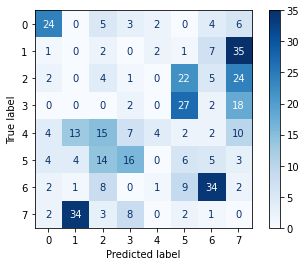

In [ ]:
# one vs one svm
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier
params = {'estimator__C':[0.001,0.01,0.1,1,10,100,1000,10000]}
sm = OneVsOneClassifier(svm.SVC(random_state=42,class_weight='balanced'))
search = GridSearchCV(sm,params,cv=5,scoring='accuracy')
clf = search.fit(X_train_lsi.tolist(), train["leaf_label"].tolist())
test_pred=clf.best_estimator_.predict(X_test_lsi)
print(clf.best_estimator_)
score(test["leaf_label"], test_pred)

OneVsRestClassifier(estimator=SVC(C=1, class_weight='balanced',
                                  random_state=42))
confusion matrix
[[24  0  0  7  6  0  2  5]
 [ 1  0  1  1  4  0  7 34]
 [ 2  0  3  3  0 18  9 23]
 [ 0  0  0 12  4 22  3  8]
 [ 6 12 15  6  1  8  6  3]
 [ 0 12  5 20  0  1  9  5]
 [ 3  2  6  2  0  2 41  1]
 [ 0 31  1  7  0  9  1  1]]
accuracy
0.2
recall
0.2
precision
0.19358403065500646
f1 score
0.19085331161088143


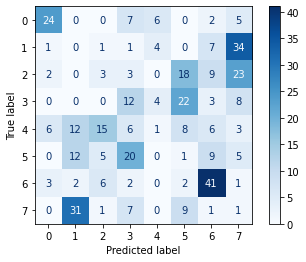

In [ ]:
# one vs rest svm
from sklearn.multiclass import OneVsRestClassifier

params = {'estimator__C':[0.001,0.01,0.1,1,10,100,1000,10000]}
sm = OneVsRestClassifier(svm.SVC(random_state=42,class_weight='balanced'))
search = GridSearchCV(sm,params,cv=5,scoring='accuracy')
clf = search.fit(X_train_lsi.tolist(), train["leaf_label"].tolist())
test_pred=clf.best_estimator_.predict(X_test_lsi)
print(clf.best_estimator_)
score(test["leaf_label"], test_pred)

confusion matrix
[[44  0  3  1  0  0  0  0]
 [ 4 48  1  0  2  0  0  0]
 [ 2  1 45  0  2  1  0  0]
 [ 1  0  1 48  0  0  0  0]
 [ 0  0  0  1 40  1  0  4]
 [ 1  0  0  0  2 50  6  1]
 [ 6  0  0  0  2  3 47  0]
 [ 0  1  1  0  2  0  0 43]]
accuracy
0.8795180722891566
recall
0.8795180722891566
precision
0.8845719917583624
f1 score
0.8802566332637812


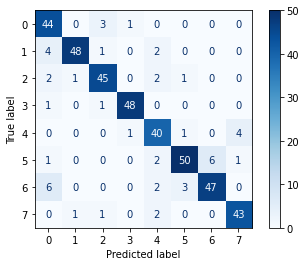

In [ ]:
# one vs one naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsOneClassifier
clf = OneVsOneClassifier(MultinomialNB(alpha=0.01)).fit(X_train_tfidf, train["leaf_label"].tolist())
test_pred=clf.predict(X_test_tfidf)
score(test["leaf_label"].tolist(), test_pred.tolist())

confusion matrix
[[39  1  1  2  1  0  0  0]
 [ 2 45  0  1  0  0  0  0]
 [ 1  1 52  2  1  1  0  0]
 [ 0  0  1 48  0  0  0  0]
 [ 1  0  1  0 51  2  0  2]
 [ 1  0  0  1  2 41  5  2]
 [ 4  1  1  0  1  2 47  1]
 [ 0  0  0  0  2  0  0 48]]
accuracy
0.8939759036144578
recall
0.8939759036144578
precision
0.8950203946794761
f1 score
0.8932799091844601


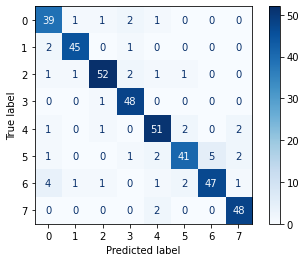

In [ ]:
# one vs rest naive_bayes
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(MultinomialNB(alpha=0.01)).fit(X_train_tfidf, train["leaf_label"].tolist())
test_pred=clf.predict(X_test_tfidf)
score(test["leaf_label"], test_pred)

In [ ]:
# merge  5 6
#train["leaf_label"].tolist()
merg_la={'earthquake':'flood'}
train_merg_leaf_la=[merg_la[i] if i in merg_la else i for i in train["leaf_label"].tolist()]
test_merg_leaf_la=[merg_la[i] if i in merg_la else i for i in test["leaf_label"].tolist()]

In [ ]:
def merg_score(test_root_label,test_pred):    
    print('confusion matrix')
    cm=confusion_matrix(test_root_label, test_pred, labels=['chess','cricket',
            'soccer','football','%22forest%20fire%22','flood','drought'])
    print(confusion_matrix(test_root_label, test_pred, labels=['chess','cricket',
            'soccer','football','%22forest%20fire%22','flood','drought']))
    print('accuracy')
    print(accuracy_score(test_root_label, test_pred))
    print('recall')
    print(recall_score(test_root_label, test_pred, average='weighted'))
    print('precision')
    print(precision_score(test_root_label, test_pred,average='weighted'))
    print('f1 score')
    print(f1_score(test_root_label, test_pred,average='weighted'))
    #cm=confusion_matrix(test["root_label"], test_pred)
    from sklearn.metrics import ConfusionMatrixDisplay
    disp =ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

confusion matrix
[[ 3  4 16  6  1 12  6]
 [ 5  3 15  3  5 12  5]
 [ 5 11 13  3 11 20  5]
 [ 7  4 10  2  3 14  7]
 [ 7 12 14  5  4 10  5]
 [10 13 32  4  6 26  8]
 [ 2  6 15  2  7 13  3]]
accuracy
0.13012048192771083
recall
0.13012048192771083
precision
0.1247392529324031
f1 score
0.12430323660846719


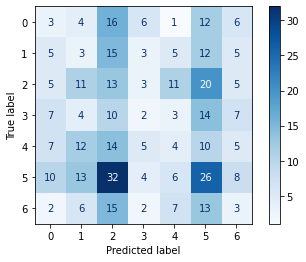

In [ ]:
# one vs one svm
from sklearn.multiclass import OneVsOneClassifier
params = {'estimator__C':[0.001,0.01,0.1,1,10,100,1000,10000]}
sm_mer = OneVsOneClassifier(svm.SVC(random_state=42,class_weight='balanced'))
search = GridSearchCV(sm_mer,params,cv=5,scoring='accuracy')
clf = search.fit(X_train_lsi.tolist(), train_merg_leaf_la)
test_pred=clf.best_estimator_.predict(X_test_lsi.tolist())
merg_score(test_merg_leaf_la, test_pred)


confusion matrix
[[ 3  5 12  5  4 15  4]
 [ 4  3 15  2  5 17  2]
 [ 7  8 12  7  6 25  3]
 [ 4  4 10  4  4 17  4]
 [ 1  8 11 12  5 14  6]
 [ 9  5 33  4 10 33  5]
 [ 3  8 14  3  7 12  1]]
accuracy
0.14698795180722893
recall
0.14698795180722893
precision
0.13084273495008472
f1 score
0.1348882350977082


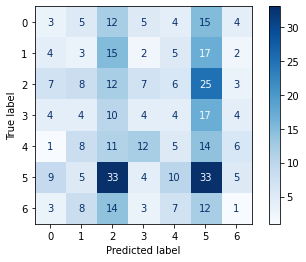

In [ ]:
# one vs Rest svm
from sklearn.multiclass import OneVsRestClassifier
params = {'estimator__C':[0.001,0.01,0.1,1,10,100,1000,10000]}
sm_mer = OneVsRestClassifier(svm.SVC(random_state=42,class_weight='balanced'))
search = GridSearchCV(sm_mer,params,cv=5,scoring='accuracy')
clf = search.fit(X_train_lsi.tolist(), train_merg_leaf_la)
test_pred=clf.best_estimator_.predict(X_test_lsi.tolist())
merg_score(test_merg_leaf_la, test_pred)



confusion matrix
[[40  0  1  2  1  0  0  0]
 [ 2 45  0  1  0  0  0  0]
 [ 2  1 52  1  1  1  0  0]
 [ 0  0  1 48  0  0  0  0]
 [ 1  0  1  0 52  1  0  2]
 [ 1  0  0  1  2 42  4  2]
 [ 4  1  1  0  1  3 46  1]
 [ 0  0  0  0  4  0  0 46]]
accuracy
0.8939759036144578
recall
0.8939759036144578
precision
0.8963571961752169
f1 score
0.8936453517792432


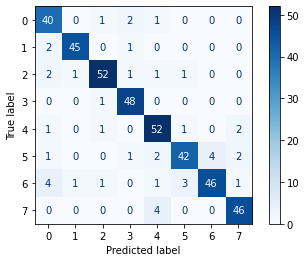

In [ ]:
# one vs one naive_bayes
clf = OneVsOneClassifier(MultinomialNB(alpha=0.01)).fit(X_train_tfidf, train["leaf_label"].tolist())
test_pred=clf.predict(X_test_tfidf)
score(test["leaf_label"].tolist(), test_pred.tolist())

confusion matrix
[[39  1  1  2  1  0  0  0]
 [ 2 45  0  1  0  0  0  0]
 [ 1  1 52  2  1  1  0  0]
 [ 0  0  1 48  0  0  0  0]
 [ 1  0  1  0 51  2  0  2]
 [ 1  0  0  1  2 41  5  2]
 [ 4  1  1  0  1  2 47  1]
 [ 0  0  0  0  2  0  0 48]]
accuracy
0.8939759036144578
recall
0.8939759036144578
precision
0.8950203946794761
f1 score
0.8932799091844601


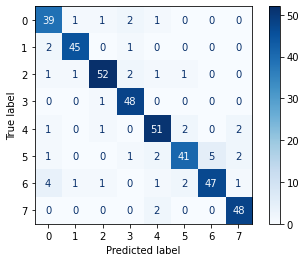

In [ ]:
# one vs rest naive_bayes
clf = OneVsRestClassifier(MultinomialNB(alpha=0.01)).fit(X_train_tfidf, train["leaf_label"].tolist())
test_pred=clf.predict(X_test_tfidf)
score(test["leaf_label"].tolist(), test_pred.tolist())

In [ ]:
# class imbalance

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
train_bala, train_leaf_bala = sm.fit_resample(X_train_tfidf, train["leaf_label"].tolist())
test_bala, test_leaf_bala = sm.fit_resample(X_test_tfidf, test["leaf_label"].tolist())


confusion matrix
[[49  2  1  2  2  2  0  0]
 [ 1 56  0  1  0  0  0  0]
 [ 2  2 52  1  0  1  0  0]
 [ 0  0  0 58  0  0  0  0]
 [ 0  2  0  0 52  0  0  4]
 [ 1  0  0  1  1 41  8  6]
 [ 3  2  1  0  0  3 48  1]
 [ 0  0  0  0  0  0  0 58]]
accuracy
0.8922413793103449
recall
0.8922413793103449
precision
0.8936394277340161
f1 score
0.890216059674615


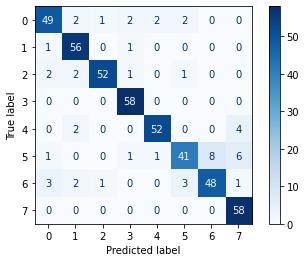

In [ ]:
# one vs one naive_bayes
#X_train_tfidf
from sklearn.multiclass import OneVsOneClassifier
clf = OneVsOneClassifier(MultinomialNB()).fit(train_bala, train_leaf_bala)
test_pred=clf.predict(test_bala)
score(test_leaf_bala, test_pred)

confusion matrix
[[52  1  0  2  2  1  0  0]
 [ 2 55  0  1  0  0  0  0]
 [ 2  2 52  1  0  1  0  0]
 [ 0  0  0 58  0  0  0  0]
 [ 0  1  0  0 53  1  0  3]
 [ 1  0  0  1  1 41  8  6]
 [ 3  2  1  0  0  3 48  1]
 [ 0  0  0  0  0  0  0 58]]
accuracy
0.8987068965517241
recall
0.8987068965517241
precision
0.899865754701189
f1 score
0.8968571786423256


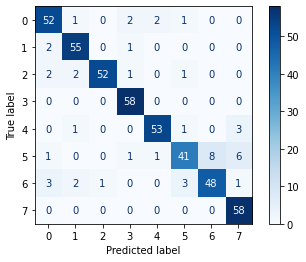

In [ ]:
# one vs rest naive_bayes
#X_train_tfidf
from sklearn.multiclass import OneVsOneClassifier
clf = OneVsRestClassifier(MultinomialNB()).fit(train_bala, train_leaf_bala)
test_pred=clf.predict(test_bala)
score(test_leaf_bala, test_pred)

confusion matrix
[[56  0  1  1  0  0  0  0]
 [ 2 55  0  1  0  0  0  0]
 [ 2  1 54  0  1  0  0  0]
 [ 1  0  0 57  0  0  0  0]
 [ 0  0  0  0 56  0  0  2]
 [ 1  1  0  1  3 48  2  2]
 [ 5  0  1  0  2  3 47  0]
 [ 0  0  0  0  4  1  0 53]]
accuracy
0.9181034482758621
recall
0.9181034482758621
precision
0.9219486121180656
f1 score
0.9177735922011482


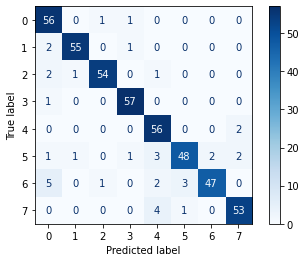

In [ ]:
# one vs one svm
from sklearn.multiclass import OneVsOneClassifier
params = {'estimator__C':[0.001,0.01,0.1,1,10,100,1000,10000]}
sm_im = OneVsOneClassifier(svm.SVC(random_state=42,class_weight='balanced')).fit(train_bala, train_leaf_bala)
search = GridSearchCV(sm_im,params,cv=5,scoring='accuracy')
clf = search.fit(train_bala, train_leaf_bala)
test_pred=clf.best_estimator_.predict(test_bala)
score(test_leaf_bala, test_pred)

confusion matrix
[[56  0  1  1  0  0  0  0]
 [ 2 55  0  1  0  0  0  0]
 [ 2  1 54  0  1  0  0  0]
 [ 0  0  0 58  0  0  0  0]
 [ 0  0  0  0 56  0  0  2]
 [ 0  1  0  1  2 49  3  2]
 [ 2  0  1  0  0  2 52  1]
 [ 0  0  0  0  1  1  0 56]]
accuracy
0.9396551724137931
recall
0.9396551724137931
precision
0.9402964789438807
f1 score
0.9392006869567349


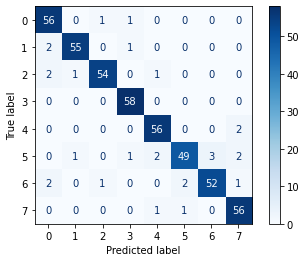

In [ ]:
# one vs rest svm
params = {'estimator__C':[0.001,0.01,0.1,1,10,100,1000,10000]}
sm_im = OneVsRestClassifier(svm.SVC(random_state=42,class_weight='balanced')).fit(train_bala, train_leaf_bala)
search = GridSearchCV(sm_im,params,cv=5,scoring='accuracy')
clf = search.fit(train_bala, train_leaf_bala)
test_pred=clf.best_estimator_.predict(test_bala)
score(test_leaf_bala, test_pred)



**Question 9**: 
* A good classifier should have a confusion matrix with large values on the main diagonal corresponding to high TPRs and TNRs and small values off the main diagonal corresponding to low FPRs and FNRs. The OVO and OVR Naive Bayes classifiers show this performance, but the OVO and OVR SVM classifiers have smaller values on the main diagonal and even some large values off the main diagonal, so it performs poorly at classifying most classes.
* "flood" and "earthquake" classes were merged together, since the confusion matrices show that the classifiers sometimes confused these two classes, since the values just off the main diagonal are larger for these classes. Merging improved the accuracy in the OVO Naive Bayes classification but decreased the accuracy in the other cases.
* Class imbalance negatively affected the performance of classifiers, and has more impact on svm than naive bayes. Therefore, before smote, svm has a smaller accuarcy than naive bayes. For example, for One VS One svm, classifier is more inclined to predict labels as drought due to class imbalance. 
* Using smote and class_weight='balanced' could help solving the class imbalance problem. For instance, after smote, the accuracy of One Vs Rest svm effectively improved from 0.2 to 0.94.

# Word Embedding

In [ ]:
embeddings_dict = {50: {}, 100: {}, 200: {}, 300: {}}
dimension_of_glove_list = [50, 100, 200, 300]
for dimension_of_glove in dimension_of_glove_list:
    with open(f"glove/glove.6B.{dimension_of_glove}d.txt", 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[dimension_of_glove][word] = vector

In [ ]:
print(np.linalg.norm(embeddings_dict[50]["queen"]-embeddings_dict[50]["king"]-embeddings_dict[50]["wife"]+embeddings_dict[50]["husband"]))
print(np.linalg.norm(embeddings_dict[50]["queen"]-embeddings_dict[50]["king"]))
print(np.linalg.norm(embeddings_dict[50]["wife"]-embeddings_dict[50]["husband"]))
v1 = embeddings_dict[50]["queen"]-embeddings_dict[50]["king"]
v2 = embeddings_dict[50]["wife"]-embeddings_dict[50]["husband"]
print(np.dot(v1,v2)/np.linalg.norm(v1)/np.linalg.norm(v2))

3.290033
3.4777563
1.7672977
0.35743952


**Question 10**: 
- (a) Compared to the raw probabilities, the ratio is better able to distinguish relevant words from irrelevant words and it is also better able to discriminate between the two relevant words. For example, we take *i = ice* and *j = steam*. For words *k* related to ice but not steam, say *k = solid*, we expect the ratio P<sub>ik</sub>/P<sub>jk</sub> will be large. For words *k* like water or fashion, that are either related to both ice and steam, or to neither, the ratio should be close to one.

- (b) GLoVE embeddings will return the same vector for the word **running** in both cases. The reason is that GLoVE embeddings only give each word one vector representation which is trained on the ratio of co-occurrence probabilities.

- (c) We expect that ||GLoVE["queen"] - GLoVE["king"] - GLoVE["wife"] + GLoVE["husband"]||<sub>2</sub> is close to 0 and ||GLoVE["queen"] - GLoVE["king"]||<sub>2</sub> is close to ||GLoVE["wife"] - GLoVE["husband"]||<sub>2</sub>. In the above code, we print the norms of the differences of these vectors. Furthermore, we compute the cosine of the angle between GLoVE["queen"] - GLoVE["king"] and GLoVE["wife"] - GLoVE["husband"], which shows the similarity of these two vectors.

- (d) We would rather not stem or lemmatize the work before mapping it to its GLoVE embedding. The reason is that GLoVE embeddings give different vector representations for the different forms of the same word.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

analyzer = CountVectorizer().build_analyzer()

def text2vec(text, dimension_of_glove=50):
    count = 0
    sum = np.zeros(dimension_of_glove)
    for word in analyzer(text):
        if word in embeddings_dict[dimension_of_glove]:
            count += 1
            sum += embeddings_dict[dimension_of_glove][word]
    # return sum/count
    return sum/np.linalg.norm(sum)

train["clean_text"] = train["full_text"].apply(clean)
test["clean_text"] = test["full_text"].apply(clean)

train["text_vec"] = train["clean_text"].apply(text2vec)
test["text_vec"] = test["clean_text"].apply(text2vec)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# clf = SVC(gamma=2.3)
# clf.fit(train["text_vec"].tolist(), train["root_label"].tolist())
# predicted = clf.predict(test["text_vec"].tolist())
parameters = {'gamma':np.arange(1,3,0.1), 'C':[2.5, 5, 10, 20]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(train["text_vec"].tolist(), train["root_label"].tolist())
predicted = clf.predict(test["text_vec"].tolist())
print(accuracy_score(np.array(test["root_label"]), predicted))
print(clf.get_params())

0.9662650602409638
{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(), 'n_jobs': None, 'param_grid': {'gamma': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]), 'C': [2.5, 5, 10, 20]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}


In [ ]:
print(clf.best_params_)

{'C': 20, 'gamma': 2.9000000000000017}


**Question 11:**
- (a) The feature of the document is computed as follows: First, we clean the document without lemmatization. Second, we get the GLoVE word embeddings of all the words in the document. Third we compute the sum of all the word embeddings and normalize the sum into a unit vector, which is the our computed feature of the document.
- (b) The above code uses SVM classifer and the accuracy is 96.63%. Here the dimension of the word embeddings is 50.

In [ ]:
dimension_of_glove_list = [50, 100, 200, 300]
acc_list = []
for dimension_of_glove in dimension_of_glove_list:
    train["text_vec"] = train["clean_text"].apply(text2vec, dimension_of_glove=dimension_of_glove)
    test["text_vec"] = test["clean_text"].apply(text2vec, dimension_of_glove=dimension_of_glove)
    parameters = {'gamma':np.arange(1,3,0.1), 'C':[2.5, 5, 10, 20]}
    svc = SVC()
    clf = GridSearchCV(svc, parameters)
    clf.fit(train["text_vec"].tolist(), train["root_label"].tolist())
    predicted = clf.predict(test["text_vec"].tolist())
    acc_list.append(accuracy_score(np.array(test["root_label"]), predicted))
    print(clf.best_params_)

{'C': 20, 'gamma': 2.9000000000000017}
{'C': 20, 'gamma': 2.7000000000000015}
{'C': 10, 'gamma': 2.8000000000000016}
{'C': 10, 'gamma': 2.8000000000000016}


In [ ]:
acc_list

[0.9662650602409638,
 0.9710843373493976,
 0.9734939759036144,
 0.9759036144578314]

Text(0, 0.5, 'Accuracy')

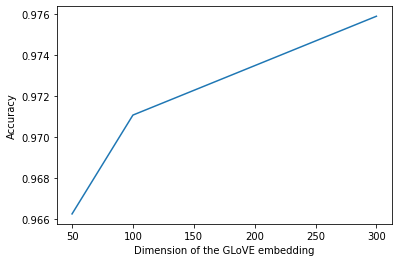

In [ ]:
from matplotlib import pyplot as plt
plt.plot(dimension_of_glove_list, acc_list)
plt.xlabel("Dimension of the GLoVE embedding")
plt.ylabel("Accuracy")

**Question 12**

- The plot is shown above. We can see that as the dimension of the GLoVE embedding increases, the accuracy also increases. It is expected because higher dimension gives more representation power to the word embeddings and the computed feature of the document.

In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 29.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=fe2fa333f4c7ff30c8ab5bc97dc7ac15f795907642903b8a3a10b9d706cd4872
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=bc9cecd3f0eec1e594e47b547fa88be189d96e6082c35b1ca7ce544f83e2f490
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(train["text_vec"].tolist())

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0.5, 1.0, 'UMAP projection of the embeddings of the documents')

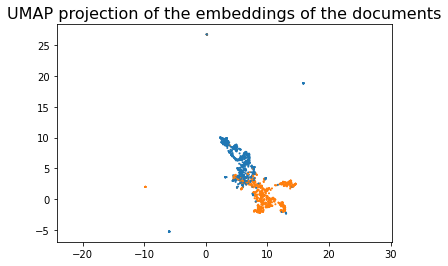

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in train["root_label"].map({"sports":0, "climate":1})],s=1)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the embeddings of the documents', fontsize=16)

Text(0.5, 1.0, 'UMAP projection of the random points')

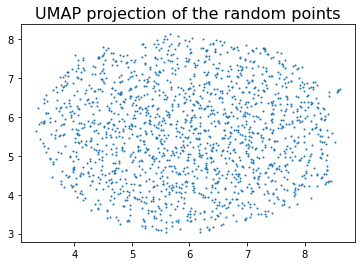

In [ ]:
random_points = np.random.randn(1657, 50)
random_points = random_points/(np.linalg.norm(random_points,2, axis=1).reshape(-1,1))
reducer_1 = umap.UMAP()
embedding_1 = reducer_1.fit_transform(random_points)
plt.scatter(embedding_1[:, 0], embedding_1[:, 1], s=1)
plt.title('UMAP projection of the random points', fontsize=16)

**Question 13**

- In the visualization of the embeddings of the documents, we can see that two clusters are formed. In the visualization of the normalized random points, we can see that these points are scattered and no cluster is formed.